In [2]:
# link for video : https://www.youtube.com/watch?v=fJ82678KNCk&list=PL6_D9USWkG1CuKTolr0FoZMjG91PMiCKp&index=8&ab_channel=AbhishekAgarrwal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tips=sns.load_dataset("tips")

In [4]:
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [16]:
tips.day.unique()
a=tips.day.value_counts()
a

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

observation: Most of the people come to hotel on saturday .

In [19]:
tips.time.unique()
b=tips.time.value_counts()
b

Dinner    176
Lunch      68
Name: time, dtype: int64

<AxesSubplot:>

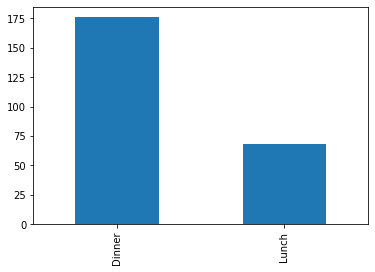

In [21]:
tips.time.value_counts().plot(kind="bar")

Observation: Most of the people come for Dinner

In [23]:
# too check the percentage of dinner or lunch
tips.time.value_counts(normalize=True)*100

Dinner    72.131148
Lunch     27.868852
Name: time, dtype: float64

In [26]:
# when do people pay more tip.... during lunch or dinner?
tips.groupby(["time"])["tip"].mean()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

<AxesSubplot:xlabel='time'>

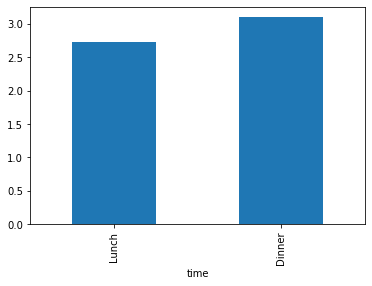

In [27]:
tips.groupby(["time"])["tip"].mean().plot.bar()

Observation: People pay more tip during Dinner

In [29]:
#Similarly we can find the tips wrt to sex, day, size, smoker/nonsmoker
tips.groupby(["day"])["tip"].mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

observation: More Tip is recieved on Sunday

In [30]:
tips.groupby(["size"])["tip"].mean()

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

Observation: When the family size is of 6 the tip recieved is maximum

In [33]:
tips.groupby(["sex"])["tip"].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

Observation: Males pay more tip as compared to females

In [34]:
tips.groupby(["smoker"])["tip"].mean()

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

In [40]:
# to be more precise about smoker(male or female) or non-smoker(male or female)
tips.groupby(["smoker","sex"])["tip"].mean()

smoker  sex   
Yes     Male      3.051167
        Female    2.931515
No      Male      3.113402
        Female    2.773519
Name: tip, dtype: float64

Observation: 
             Non-Smoker males gives more tip as compared to Smoker-Males
             
             Smoker Females gives more tip as compared to Non-Smoker Females

In [41]:
#lets put the above thing in a pivot structure
tips.groupby(["smoker","sex"])["tip"].mean().unstack()

sex,Male,Female
smoker,,
Yes,3.051167,2.931515
No,3.113402,2.773519


In [42]:
# lets do pivoting for other dimensions
tips.groupby(["time","sex"])["tip"].mean().unstack()

sex,Male,Female
time,,
Lunch,2.882121,2.582857
Dinner,3.144839,3.002115


In [44]:
tips.groupby(["day","time"])["tip"].mean().unstack()

time,Lunch,Dinner
day,,
Thur,2.767705,3.000000
Fri,2.382857,2.940000
Sat,NaN,2.993103
Sun,NaN,3.255132


In [48]:
#Now lets create a new column to find out the percenatge of the tip compared to total bill
tips["tips_percentage"]=(tips.tip/tips.total_bill)*100
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tips_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [49]:
#doing the  above procedures on tips _percentage column
tips.groupby(["smoker","sex"])["tips_percentage"].mean()

smoker  sex   
Yes     Male      15.277118
        Female    18.215035
No      Male      16.066872
        Female    15.692097
Name: tips_percentage, dtype: float64

In [50]:
tips.groupby(["time","sex"])["tips_percentage"].mean().unstack()

sex,Male,Female
time,,
Lunch,16.608263,16.228493
Dinner,15.540653,16.932157


# Now lets visualise the relationship between total bill and tips

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

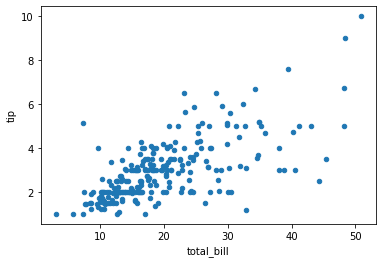

In [51]:
tips.plot.scatter(x="total_bill",y="tip")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

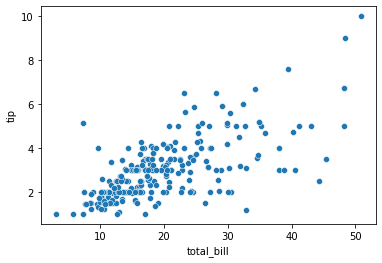

In [52]:
#Using sns library
sns.scatterplot(x="total_bill",y="tip",data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

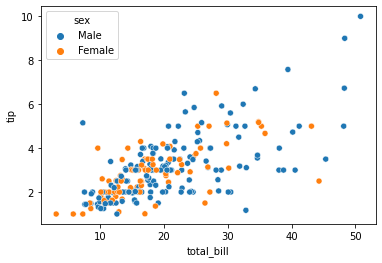

In [53]:
# to be more precise wrt gender
sns.scatterplot(x="total_bill",y="tip",data=tips, hue="sex")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

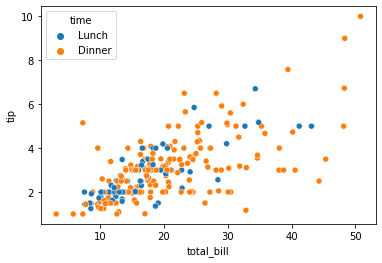

In [54]:
# to be more precise wrt time
sns.scatterplot(x="total_bill",y="tip",data=tips, hue="time")

# creating the bifurcation of time on the chart above based on gender 

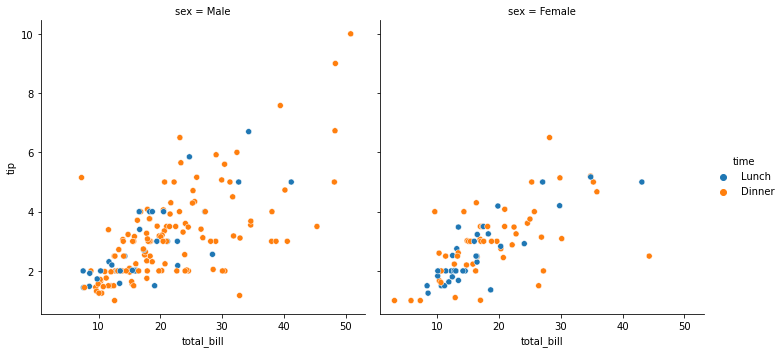

In [56]:
sns.relplot(x="total_bill",y="tip",data=tips, col="sex",hue="time")

# Distribution of total bill by time

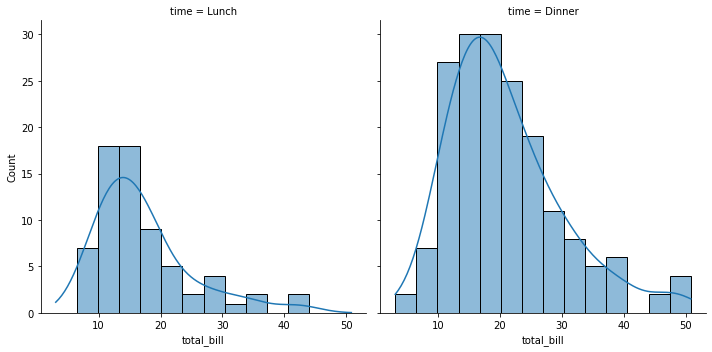

In [58]:
sns.displot(data=tips,x="total_bill",col="time",kde=True)

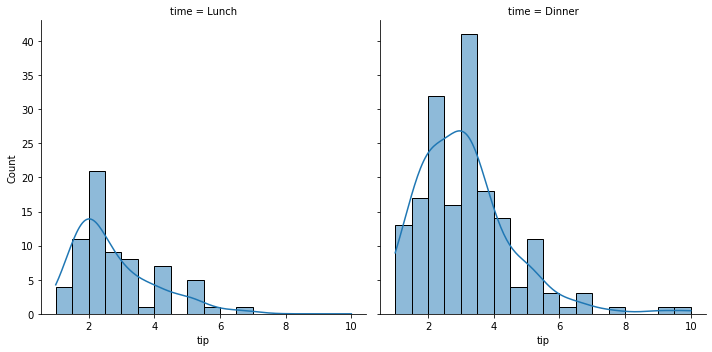

In [60]:
sns.displot(data=tips,x="tip",col="time",kde=True)

# Creating Correlation and distribution for all the numeric variables by gender

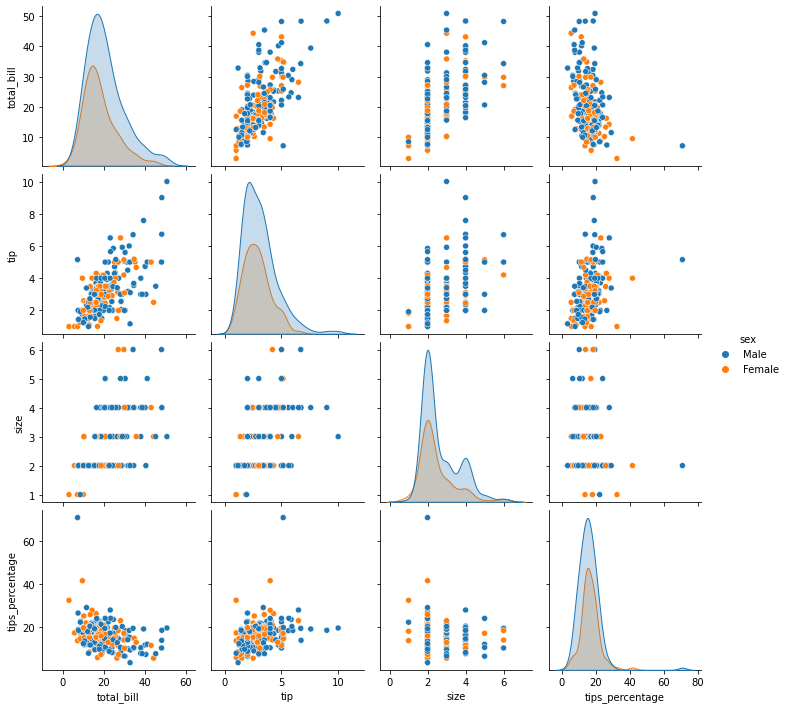

In [63]:
sns.pairplot(data=tips,hue="sex")